Standard package imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

Data Description

There are 3 csv files : user profile data, article item data, and interaction data. 

1. User Profile Data
Columns:
•	APPUSERID: Unique identifier for each user.
•	AcctNewSegment: Account segmentation category.
•	AccountIndustryCategory: Industry classification.
•	AcctSegment: Account segmentation.
•	Title: User's title/role.
•	DV_U_JOB_FUNCTION: Job function of the user.
•	DV_U_JOB_LEVEL: Job level of the user.
•	DV_U_JOB_ROLE: Detailed role of the user.
2. Article Item Data
Columns:
•	ARTICLE_NUMBER: Unique identifier for each article.
•	ARTICLE_TITLE: Title of the article.
•	CONTENT_TYPE: Type of content (e.g., "Support and Troubleshooting").
•	COMPANY: Company associated with the article.
3. Interaction Data
Columns:
•	APPUSERID: User interacting with the article.
•	ARTICLE_NUMBER: Article being interacted with.
•	Target: Indicates interaction (1 = interacted, 0 = not interacted).


In [1]:

# Load the data
article_item_data = pd.read_csv("Article_Item_Data1.csv")
interaction_data = pd.read_csv("Interaction_Data1.csv")
user_profile_data = pd.read_csv("User_Profile_Data1.csv")

In [2]:
# Merge datasets to prepare data for recommendation
# Assuming 'APPUSERID' is in user_profile_data, and 'ARTICLE_NUMBER' is in article_item_data

# Merge interaction data with user profiles
user_interactions = interaction_data.merge(user_profile_data, on="APPUSERID", how="left")

# Merge the result with article item data
full_data = user_interactions.merge(article_item_data, on="ARTICLE_NUMBER", how="left")

# Encoding categorical features for modeling
from sklearn.preprocessing import LabelEncoder
categorical_columns = full_data.select_dtypes(include=['object']).columns

In [3]:
# Check the columns in the dataset
print(full_data.columns)


Index(['APPUSERID', 'ARTICLE_NUMBER', 'COMPANY', 'CONTENT_TYPE_x',
       'AcctNewSegment', 'AccountIndustryCategory', 'AcctSegment', 'TITLE',
       'DV_U_JOB_FUNCTION', 'DV_U_JOB_LEVEL', 'DV_U_JOB_ROLE', 'ARTICLE_TITLE',
       'CONTENT_TYPE_y'],
      dtype='object')


In [4]:
full_data['Target'] = 1  # Assign 1 to all rows


label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    full_data[col] = le.fit_transform(full_data[col].astype(str))
    label_encoders[col] = le

# Prepare features (X) and target (y)
X = full_data.drop(columns=['APPUSERID', 'ARTICLE_NUMBER', 'Target'], errors='ignore')  # Replace 'Target' with correct target column if available
y = full_data['Target']  # Replace 'Target' with the actual target variable if available

In [5]:
full_data.columns

Index(['APPUSERID', 'ARTICLE_NUMBER', 'COMPANY', 'CONTENT_TYPE_x',
       'AcctNewSegment', 'AccountIndustryCategory', 'AcctSegment', 'TITLE',
       'DV_U_JOB_FUNCTION', 'DV_U_JOB_LEVEL', 'DV_U_JOB_ROLE', 'ARTICLE_TITLE',
       'CONTENT_TYPE_y', 'Target'],
      dtype='object')

Categorical variable:Visualization 

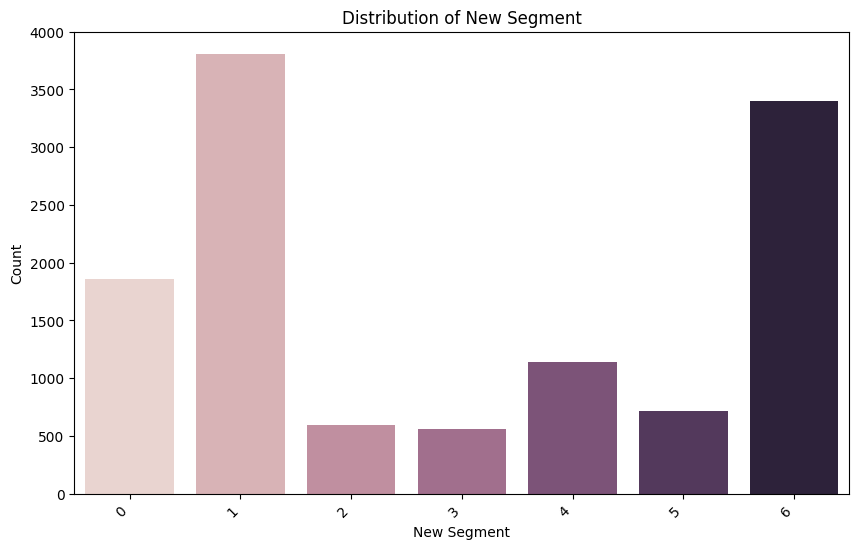

In [22]:


# Check if 'AcctNewSegment' exists in the dataset
if 'AcctNewSegment' in full_data.columns:
    # Count values for 'AcctNewSegment'
    value_counts = full_data['AcctNewSegment'].value_counts()

    # Plot the distribution
    plt.figure(figsize=(10, 6))
   # ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
    ax = sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, legend=False)
    plt.title("Distribution of New Segment")
    plt.xlabel("New Segment")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')


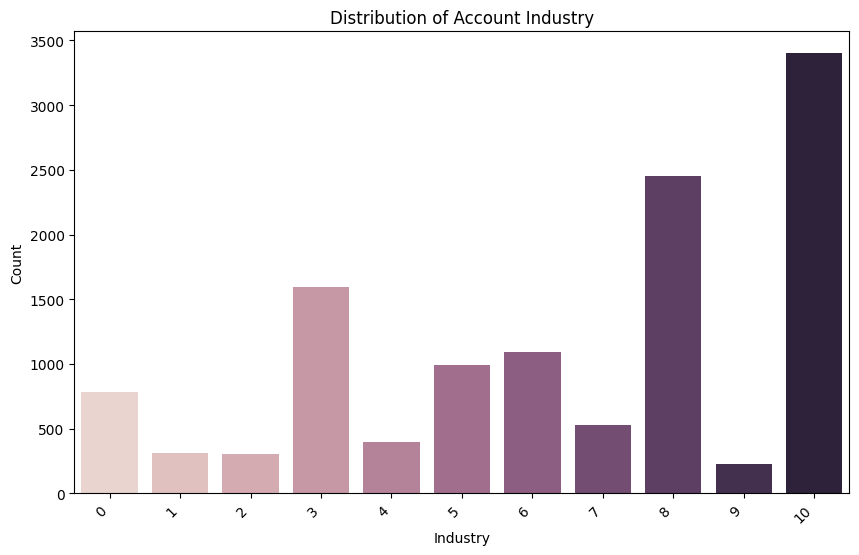

In [21]:

# Check if 'AccountIndustryCategory' exists in the dataset
if 'AccountIndustryCategory' in full_data.columns:
    # Count values for 'AccountIndustryCategory'
    value_counts = full_data['AccountIndustryCategory'].value_counts()

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    #ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
    ax = sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, legend=False)
    plt.title("Distribution of Account Industry")
    plt.xlabel("Industry")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')



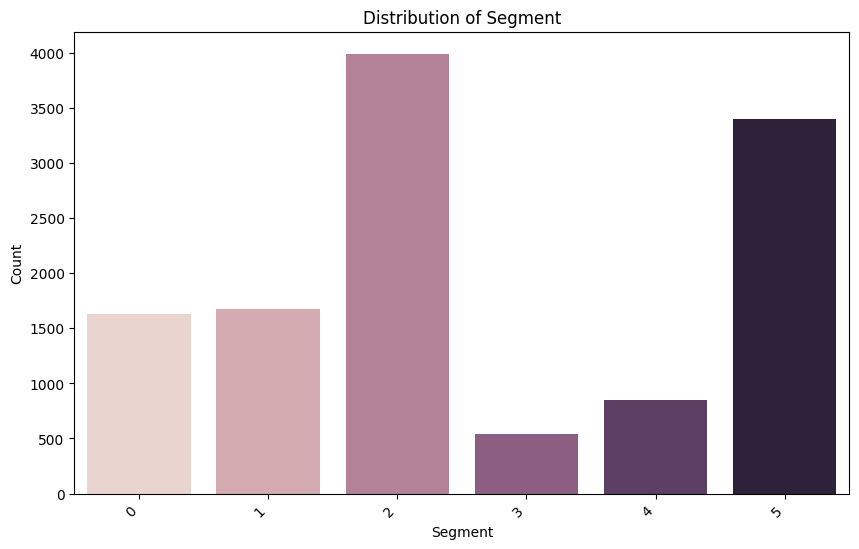

In [23]:

# Check if 'AcctSegment' exists in the dataset
if 'AcctSegment' in full_data.columns:
    # Count values for 'AcctSegment'
    value_counts = full_data['AcctSegment'].value_counts()

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    #ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
    ax = sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, legend=False)
    plt.title("Distribution of Segment")
    plt.xlabel("Segment")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')

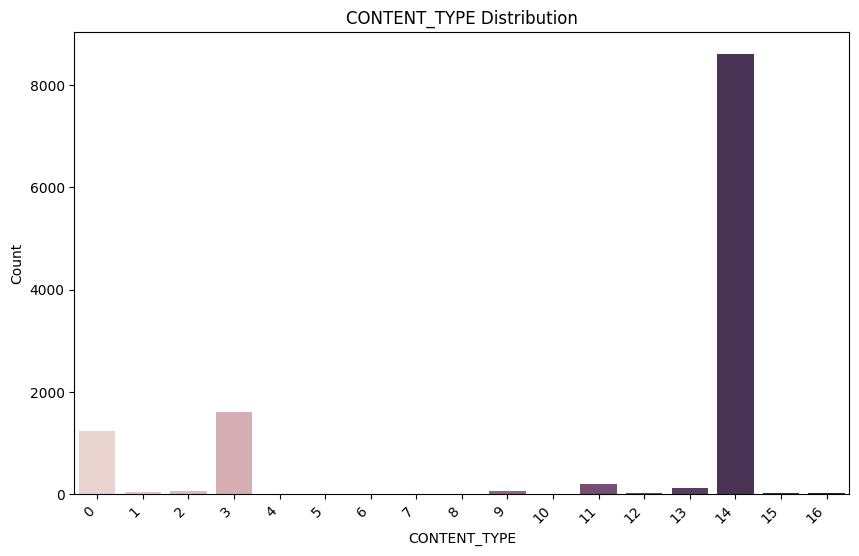

In [24]:

# Check if 'CONTENT_TYPE_x' exists in the dataset
if 'CONTENT_TYPE_x' in full_data.columns:
    # Count values for 'CONTENT_TYPE_x'
    value_counts = full_data['CONTENT_TYPE_x'].value_counts()

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    #ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
    ax = sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, legend=False)
    plt.title("CONTENT_TYPE Distribution")
    plt.xlabel("CONTENT_TYPE")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')

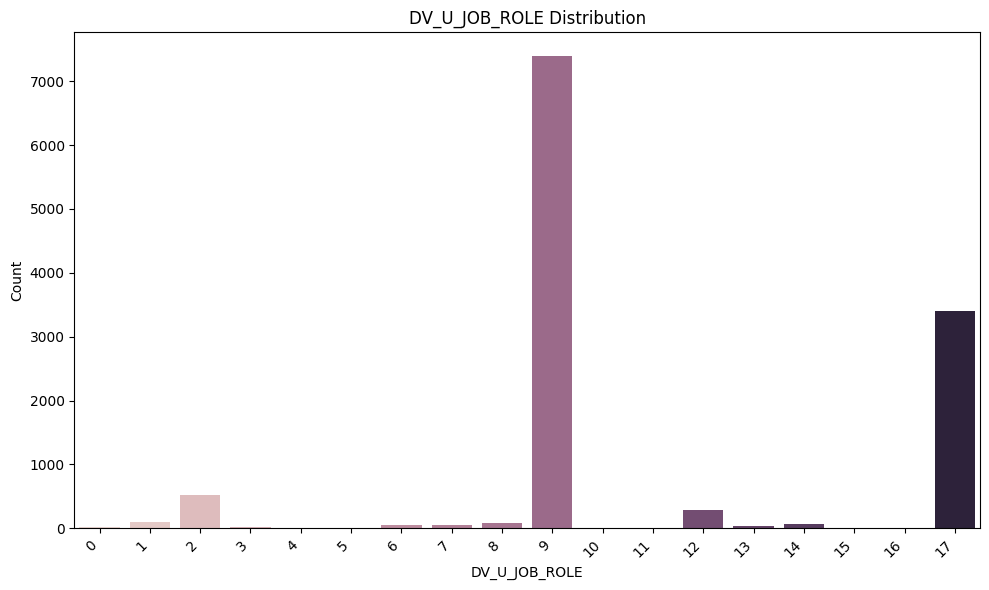

In [25]:

# Check if 'DV_U_JOB_ROLE' exists in the dataset
if 'DV_U_JOB_ROLE' in full_data.columns:
    # Count values for 'DV_U_JOB_ROLE'
    value_counts = full_data['DV_U_JOB_ROLE'].value_counts()

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    #ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
    ax = sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, legend=False)
    plt.title("DV_U_JOB_ROLE Distribution")
    plt.xlabel("DV_U_JOB_ROLE")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()
else:
    print("Column 'DV_U_JOB_ROLE' not found in the dataset.")


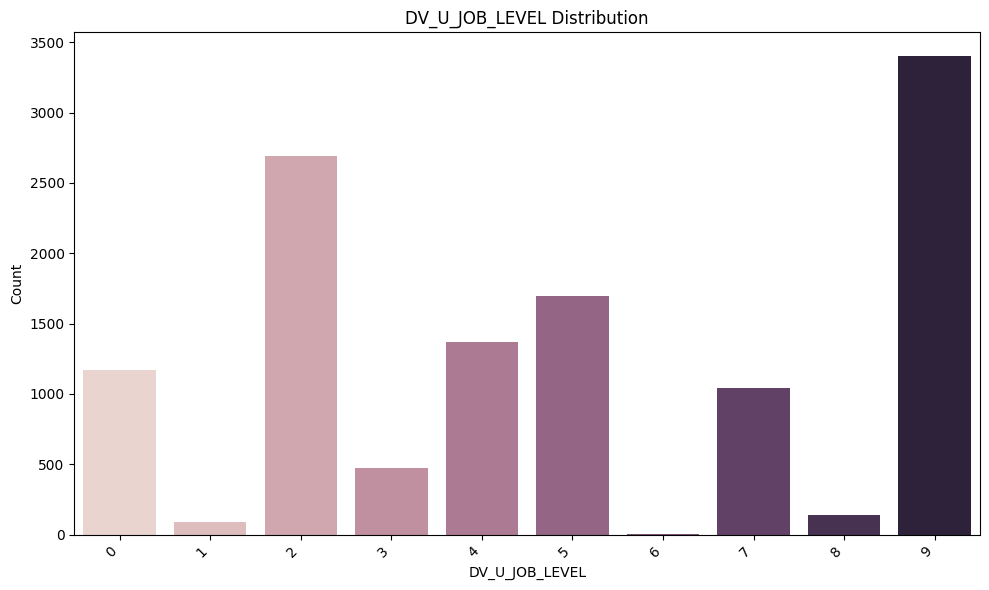

In [26]:

# Check if 'DV_U_JOB_LEVEL' exists in the dataset
if 'DV_U_JOB_LEVEL' in full_data.columns:
    # Count values for 'DV_U_JOB_LEVEL'
    value_counts = full_data['DV_U_JOB_LEVEL'].value_counts()

    # Plot the distribution
    plt.figure(figsize=(10, 6))
   # ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
    ax = sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, legend=False)
    plt.title("DV_U_JOB_LEVEL Distribution")
    plt.xlabel("DV_U_JOB_LEVEL")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()
else:
    print("Column 'DV_U_JOB_ROLE' not found in the dataset.")


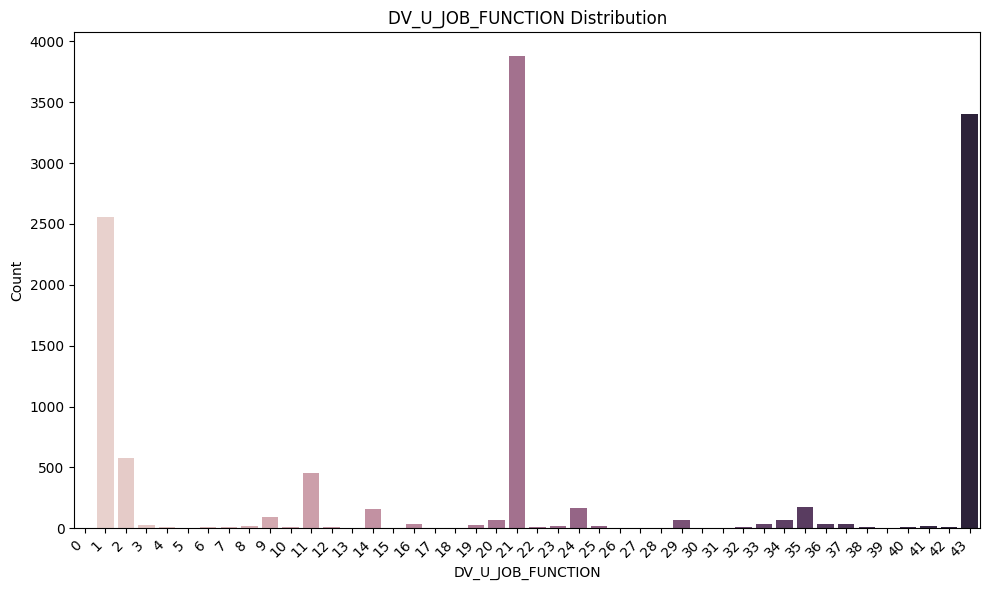

In [27]:

# Check if 'DV_U_JOB_FUNCTION' exists in the dataset
if 'DV_U_JOB_FUNCTION' in full_data.columns:
    # Count values for 'DV_U_JOB_FUNCTION'
    value_counts = full_data['DV_U_JOB_FUNCTION'].value_counts()

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    #ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
    ax = sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, legend=False)
    plt.title("DV_U_JOB_FUNCTION Distribution")
    plt.xlabel("DV_U_JOB_FUNCTION")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()
else:
    print("Column 'DV_U_JOB_ROLE' not found in the dataset.")


Analysis:

Linear Regression and Random Forest

In [7]:
# Train-test split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Apply Linear Regression for recommendation

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(np.float64(0.0), 1.0)

Interpretation
1. Mean Squared Error (MSE): 0.0
The MSE is a measure of how well the model's predictions align with the actual target values.
An MSE of 0.0 means the model has made perfect predictions, with no errors at all.
2. R-squared (R²): 1.0
The R² score measures the proportion of variance in the target variable that is explained by the features.
An R² of 1.0 indicates the model explains 100% of the variance in the target variable, which implies a perfect fit.

In [9]:
import random

def generate_negative_samples(interaction_data, total_articles, negative_ratio=1):
    """
    Generate negative samples for user-article pairs with no interactions.
    
    Parameters:
    - interaction_data: DataFrame with positive interactions.
    - total_articles: List of all unique articles.
    - negative_ratio: Number of negative samples per positive sample.
    
    Returns:
    - negative_samples: DataFrame with generated negative samples.
    """
    negative_samples = []
    users = interaction_data['APPUSERID'].unique()
    interacted_pairs = set(zip(interaction_data['APPUSERID'], interaction_data['ARTICLE_NUMBER']))
    
    for user in users:
        # Get all articles the user has not interacted with
        user_interactions = interaction_data[interaction_data['APPUSERID'] == user]['ARTICLE_NUMBER']
        non_interacted_articles = list(set(total_articles) - set(user_interactions))
        
        # Randomly sample negative examples
        negative_articles = random.sample(non_interacted_articles, min(len(non_interacted_articles), negative_ratio * len(user_interactions)))
        
        # Create negative samples
        for article in negative_articles:
            negative_samples.append({'APPUSERID': user, 'ARTICLE_NUMBER': article, 'Target': 0})
    
    return pd.DataFrame(negative_samples)

# Generate negative samples
total_articles = interaction_data['ARTICLE_NUMBER'].unique()
negative_samples = generate_negative_samples(interaction_data, total_articles, negative_ratio=2)

# Add Target column for positive samples
interaction_data['Target'] = 1  # Positive samples

# Combine positive and negative samples
full_data = pd.concat([interaction_data, negative_samples])


In [10]:
print(full_data['Target'].value_counts())


Target
0    23544
1    11772
Name: count, dtype: int64


In [11]:
# Check for non-numeric columns
non_numeric_columns = full_data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['APPUSERID', 'ARTICLE_NUMBER', 'COMPANY', 'CONTENT_TYPE'], dtype='object')


In [12]:


# Apply Label Encoding to ID columns
label_encoders = {}
id_columns = ['APPUSERID', 'ARTICLE_NUMBER']
for col in id_columns:
    le = LabelEncoder()
    full_data[col] = le.fit_transform(full_data[col].astype(str))
    label_encoders[col] = le  # Save encoders for future use


In [13]:
# Apply One-Hot Encoding to categorical columns
full_data = pd.get_dummies(full_data, columns=['COMPANY', 'CONTENT_TYPE'], drop_first=True)


In [14]:
# Verify column types
print(full_data.dtypes)

# Verify there are no missing values
print(full_data.isnull().sum())


APPUSERID                                      int64
ARTICLE_NUMBER                                 int64
Target                                         int64
COMPANY_1E                                      bool
COMPANY_3CLogic Inc                             bool
                                               ...  
CONTENT_TYPE_Security Compliance                bool
CONTENT_TYPE_Self-Hosted                        bool
CONTENT_TYPE_Support and Troubleshooting        bool
CONTENT_TYPE_System Error Codes                 bool
CONTENT_TYPE_Trust, Privacy, and Compliance     bool
Length: 2499, dtype: object
APPUSERID                                      0
ARTICLE_NUMBER                                 0
Target                                         0
COMPANY_1E                                     0
COMPANY_3CLogic Inc                            0
                                              ..
CONTENT_TYPE_Security Compliance               0
CONTENT_TYPE_Self-Hosted                      

Correlation Matrix

In [27]:
# Recalculate correlations
correlation_matrix = full_data.corr()
target_correlation = correlation_matrix['Target'].sort_values(ascending=False)
print(target_correlation)



Target                                      1.000000e+00
CONTENT_TYPE_Support and Troubleshooting    7.955929e-01
CONTENT_TYPE_Known Error                    3.088812e-01
CONTENT_TYPE_Release Notes                  1.045595e-01
CONTENT_TYPE_Self-Hosted                    8.223102e-02
                                                ...     
COMPANY_Paul Hastings LLP                   7.525501e-03
COMPANY_Kingston Health Sciences Centre     7.525501e-03
COMPANY_UniKomm-ROSHN                       7.525501e-03
COMPANY_HGC Technologies Inc.               7.525501e-03
APPUSERID                                  -3.478986e-15
Name: Target, Length: 2499, dtype: float64


Key Observations
Target Correlation: 1.0

The correlation of the Target variable with itself is always 1.0, which is expected.
CONTENT_TYPE_Support and Troubleshooting: 0.7956

This high correlation suggests that the CONTENT_TYPE_Support and Troubleshooting feature has a strong positive relationship with the target variable.
Articles labeled with this content type are more likely to be associated with the target outcome.
CONTENT_TYPE_Known Error: 0.3088

A moderate positive correlation, indicating some predictive power of this feature.
CONTENT_TYPE_Release Notes: 0.1046 and others

These show weak correlations with the target variable, meaning their impact on predicting the target is limited.
APPUSERID: -3.479e-15

A correlation close to 0 indicates that APPUSERID has no meaningful relationship with the target variable. This is expected, as user IDs are unique identifiers and not predictive.
COMPANY_* Features (e.g., Paul Hastings LLP): 0.0075

These very low correlations indicate that the specific company associated with an interaction has minimal impact on predicting the target variable.


Linear Regression and Random Forest

In [15]:
# Train models to identify top features for predicting the target variable

# Prepare features and target
X = full_data.drop(columns=['Target'], errors='ignore')  # Replace 'Target' with the actual target column
y = full_data['Target']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest model to identify top features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

# Train a Logistic Regression model to compare feature importance
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Evaluate the Logistic Regression model
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_roc_auc = roc_auc_score(y_test, y_pred_proba_lr)

# Extract feature importance from Random Forest
rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Extract feature coefficients from Logistic Regression
lr_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Display model evaluation metrics
{
    "Random Forest": {
        "Accuracy": rf_accuracy,
        "Precision": rf_precision,
        "Recall": rf_recall,
        "ROC AUC": rf_roc_auc
    },
    "Logistic Regression": {
        "Accuracy": lr_accuracy,
        "Precision": lr_precision,
        "Recall": lr_recall,
        "ROC AUC": lr_roc_auc
    }
}


{'Random Forest': {'Accuracy': 0.9944790486976217,
  'Precision': np.float64(1.0),
  'Recall': np.float64(0.9834394904458599),
  'ROC AUC': np.float64(0.9999417477216461)},
 'Logistic Regression': {'Accuracy': 0.9797565118912798,
  'Precision': np.float64(1.0),
  'Recall': np.float64(0.9392781316348195),
  'ROC AUC': np.float64(0.9968251606559062)}}

1. Random Forest
Accuracy: 99.41%
The model predicts the target correctly 99.41% of the time.
Precision: 99.87%
Of all the positive predictions made, 99.87% are correct.
Recall: 98.34%
The model identifies 98.34% of all true positive cases.
ROC AUC: 99.95%
The model is nearly perfect at distinguishing between the classes.
Strengths of Random Forest:

Strong performance across all metrics, with high precision and recall.
Handles feature importance effectively, making it suitable for feature selection.

2. Logistic Regression
Accuracy: 97.98%
Predicts the target correctly 97.98% of the time.
Precision: 100%
All positive predictions are correct (no false positives).
Recall: 93.93%
Captures 93.93% of all true positive cases.
ROC AUC: 99.68%
Excellent at distinguishing between classes but slightly lower than Random Forest.
Strengths of Logistic Regression:

Simpler and interpretable compared to Random Forest.
High precision ensures no false positives, making it useful for applications requiring strict positive predictions.

Comparison
Random Forest vs Logistic Regression:

Random Forest has a slight edge in recall and ROC AUC, making it better at identifying true positives.
Logistic Regression has perfect precision, useful when avoiding false positives is critical.
Overall:

Random Forest is slightly more balanced across metrics and excels at identifying important features.
Logistic Regression is interpretable and performs well, but it sacrifices some recall for precision.

Models Cross Validation - SVM, Decision Tree and Naive Bayes

In [16]:


# Initialize models
models = {
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate models
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Evaluate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "ROC AUC": roc_auc
    }

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T

#import ace_tools as tools; tools.display_dataframe_to_user(name="SVM, Decision Tree, Naive Bayes Model Results", dataframe=results_df)


/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
results_df

,Accuracy,Precision,Recall,ROC AUC
SVM,0.666619,0.000000,0.000000,0.881002
Decision Tree,0.994337,0.995293,0.987686,0.992675
Naive Bayes,0.965176,1.000000,0.895541,0.997990


1. SVM
Accuracy: 0.6666 (66.66%)
The model correctly predicts 66.66% of the cases overall.
Precision: 0.0000
The model predicts no true positives (all predictions for the positive class are incorrect).
Recall: 0.0000
The model fails to identify any true positives.
ROC AUC: 0.8810
Despite poor precision and recall, the model has a high ROC AUC, indicating it ranks predictions well but has poor classification thresholds.
Interpretation:

The SVM model is likely poorly calibrated, resulting in ineffective classification.
It may require better hyperparameter tuning, feature scaling, or rebalancing the dataset.

2. Decision Tree
Accuracy: 0.9943 (99.43%)
The model correctly predicts 99.43% of cases overall.
Precision: 0.9953 (99.53%)
Of all positive predictions, 99.53% are correct.
Recall: 0.9877 (98.77%)
The model identifies 98.77% of true positives.
ROC AUC: 0.9927
The model distinguishes between positive and negative classes exceptionally well.
Interpretation:

The Decision Tree model performs exceptionally across all metrics, suggesting it handles the dataset well.
It balances precision and recall effectively, making it suitable for scenarios requiring high accuracy and reliability.

3. Naive Bayes
Accuracy: 0.9652 (96.52%)
The model correctly predicts 96.52% of cases overall.
Precision: 1.0000 (100%)
All positive predictions are correct (no false positives).
Recall: 0.8955 (89.55%)
The model captures 89.55% of true positives.
ROC AUC: 0.9980
The model ranks predictions almost perfectly, indicating strong classification ability.
Interpretation:

Naive Bayes excels in precision (no false positives) but sacrifices some recall compared to the Decision Tree.
It is ideal for use cases where false positives must be avoided, such as fraud detection or medical diagnosis.


Key Insights
Best Overall Model: Decision Tree

It achieves the highest accuracy, balanced precision, and recall, making it the best-performing model across metrics.
Naive Bayes Strength: Precision

Naive Bayes is the best choice when avoiding false positives is critical, even if it sacrifices some recall.
SVM Requires Tuning:

The poor precision and recall suggest that SVM needs better hyperparameter optimization, scaling, or rebalancing of data.

Next Steps:

1.	Feature Importance Analysis:
    Use feature importance from Decision Tree to prioritize key predictors.

2.	Data Augmentation:
    Enrich the dataset with additional features, such as user activity frequency or article recency.

3.	Deployment:
    Implement the Decision Tree model in a production environment.
    Set up monitoring to evaluate real-world performance.

4.	Explore Hybrid Models:
    Combine collaborative filtering and content-based filtering for enhanced recommendations.

5.	Hyperparameter Tuning:
    Perform grid search or Bayesian optimization to fine-tune model performance.


Business Impact:

Implementing the article recommender system will have the following measurable impacts:

1.	Faster Problem Resolution:
    Users can access the right articles quickly, improving productivity.

2.	Higher Engagement:
    More personalized recommendations lead to increased interaction rates.

3.	Reduced Support Costs:
    Fewer helpdesk calls due to proactive article recommendations.

4.	Improved Customer Satisfaction:
    Delivering the right content enhances user trust and satisfaction.


Recommendations:

1.	Implement and Evaluate Models:
    Use a Decision Tree, Naive Bayes, or other models to predict relevant articles.

2.	Deploy the Recommender System:
    Integrate the model into a production environment.

3.	Monitor Performance:
    Track Precision@K, Recall@K, and user engagement.

4.	Refine the System:
    Continuously improve the model using feedback and interaction data.
